In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
file_path = "C://Users//moham//Downloads//project//python p//Python Foundation Case Study 3 - Insurance Claims Case Study//Case Study 3 - Insurance Claims Case Study//"
file_name1 = "claims.csv"
file_name2 = "cust_demographics.csv"

In [3]:
claims = pd.read_csv(file_path + file_name1)
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
cust_demographics = pd.read_csv(file_path + file_name2)
cust_demographics

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [6]:
combined_data = pd.merge(right = claims,left = cust_demographics,right_on = "customer_id",left_on = "CUST_ID",how = "inner")
combined_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [8]:
for column in combined_data.columns:
    if column in cust_demographics.columns:
        dtype = combined_data[column].dtypes
        expected = cust_demographics.dtypes[column]
        if dtype != expected:
            print(f"column:{column} and dtype:{dtype} and expected dype:{expected}")
    else:
        print(f"column '{column}' not found in cust_demographics")

column 'claim_id' not found in cust_demographics
column 'customer_id' not found in cust_demographics
column 'incident_cause' not found in cust_demographics
column 'claim_date' not found in cust_demographics
column 'claim_area' not found in cust_demographics
column 'police_report' not found in cust_demographics
column 'claim_type' not found in cust_demographics
column 'claim_amount' not found in cust_demographics
column 'total_policy_claims' not found in cust_demographics
column 'fraudulent' not found in cust_demographics


In [9]:
combined_data["claim_amount"] = pd.to_numeric(combined_data["claim_amount"].replace("[/$,]", '',regex = True))
combined_data["claim_amount"]

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

In [10]:
combined_data["Injury claims"] = (combined_data["claim_type"] == "Injury only").astype(int)
combined_data["Injury claims"]

0       0
1       0
2       0
3       0
4       0
       ..
1080    0
1081    0
1082    1
1083    0
1084    0
Name: Injury claims, Length: 1085, dtype: int32

In [11]:
combined_data.sort_values(by = ["customer_id","claim_id"],ascending = [True,False],inplace = True)
combined_data.drop_duplicates(subset = "customer_id",keep = "first",inplace = True)
combined_data.reset_index(drop = True,inplace = True)
combined_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Injury claims
0,154557,Female,23-May-78,DE,962-879-1238,Platinum,69348631,154557,Driver error,04/10/2018,Auto,No,Injury only,NaN,1.0,Yes,1
1,263204,Male,20-Dec-72,TX,173-892-6314,Silver,40953049,263204,Other causes,04/04/2018,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,287476,Male,28-Jul-88,FL,364-598-1549,Silver,45780237,287476,Natural causes,10/17/2017,Auto,Unknown,Material only,1621.5,2.0,Yes,0
3,441097,Male,19-Aug-71,CA,187-348-8375,Gold,89833962,441097,Other causes,03/21/2018,Auto,Yes,Material and injury,37040.0,1.0,No,0
4,524545,Female,10-Aug-80,NC,798-862-5398,Gold,35782742,524545,Other driver error,07/27/2018,Auto,No,Injury only,35250.0,3.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,28-Jan-65,UT,517-562-4916,Silver,4549014,99674324,Other causes,07/07/2018,Auto,No,Injury only,21480.0,1.0,No,1
1074,99723844,Female,19-Jun-66,HI,457-752-1374,Gold,35453672,99723844,Natural causes,01/06/2018,Auto,Yes,Material and injury,14360.0,1.0,No,0
1075,99761663,Female,18-Nov-63,NC,643-246-4718,Silver,37305754,99761663,Natural causes,04/04/2018,Auto,No,Material only,1242.0,1.0,Yes,0
1076,99892000,Male,08-Jun-95,OR,395-246-6172,Gold,22960702,99892000,Driver error,11/13/2017,Auto,No,Material only,2415.0,2.0,Yes,0


In [12]:
grouped_data = combined_data.groupby(["customer_id","incident_cause","claim_type","claim_date"])["total_policy_claims"].sum().reset_index()
grouped_data["claim_date"] = pd.to_datetime(grouped_data["claim_date"])
grouped_data["claim_date"] = grouped_data["claim_date"].sort_values(ascending = False)
grouped_data = grouped_data[grouped_data["total_policy_claims"] > 1]
grouped_data

,customer_id,incident_cause,claim_type,claim_date,total_policy_claims
2,287476,Natural causes,Material only,2017-10-17,2.0
4,524545,Other driver error,Injury only,2018-07-27,3.0
6,684748,Other driver error,Material only,2018-07-14,2.0
8,885337,Driver error,Material only,2017-07-01,2.0
9,1123356,Crime,Material only,2018-08-23,5.0
...,...,...,...,...,...
1062,98142348,Other causes,Material only,2017-07-22,2.0
1065,98204394,Driver error,Material only,2017-02-10,6.0
1069,98537509,Driver error,Material and injury,2018-06-03,3.0
1070,98905793,Other driver error,Material only,2018-09-19,3.0


In [13]:
def impute_missing_values(x):
    for column in x.columns:
        if x[column].dtype == "float64":
            x[column].fillna(x[column].mean(),inplace = True)
        elif x[column].dtype == "object":
            x[column].fillna(x[column].mode()[0],inplace = True)
    missing = x.isnull().sum()
    print(missing)
    return combined_data
combined_data = impute_missing_values(combined_data)
combined_data["claim_amount"] = combined_data["claim_amount"].round(0)
combined_data

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
Injury claims          0
dtype: int64


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Injury claims
0,154557,Female,23-May-78,DE,962-879-1238,Platinum,69348631,154557,Driver error,04/10/2018,Auto,No,Injury only,12501.0,1.0,Yes,1
1,263204,Male,20-Dec-72,TX,173-892-6314,Silver,40953049,263204,Other causes,04/04/2018,Auto,No,Material and injury,39192.0,1.0,Yes,0
2,287476,Male,28-Jul-88,FL,364-598-1549,Silver,45780237,287476,Natural causes,10/17/2017,Auto,Unknown,Material only,1622.0,2.0,Yes,0
3,441097,Male,19-Aug-71,CA,187-348-8375,Gold,89833962,441097,Other causes,03/21/2018,Auto,Yes,Material and injury,37040.0,1.0,No,0
4,524545,Female,10-Aug-80,NC,798-862-5398,Gold,35782742,524545,Other driver error,07/27/2018,Auto,No,Injury only,35250.0,3.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,28-Jan-65,UT,517-562-4916,Silver,4549014,99674324,Other causes,07/07/2018,Auto,No,Injury only,21480.0,1.0,No,1
1074,99723844,Female,19-Jun-66,HI,457-752-1374,Gold,35453672,99723844,Natural causes,01/06/2018,Auto,Yes,Material and injury,14360.0,1.0,No,0
1075,99761663,Female,18-Nov-63,NC,643-246-4718,Silver,37305754,99761663,Natural causes,04/04/2018,Auto,No,Material only,1242.0,1.0,Yes,0
1076,99892000,Male,08-Jun-95,OR,395-246-6172,Gold,22960702,99892000,Driver error,11/13/2017,Auto,No,Material only,2415.0,2.0,Yes,0


In [14]:
combined_data["DateOfBirth"] = pd.to_datetime(combined_data["DateOfBirth"])
combined_data["claim_date"] = pd.to_datetime(combined_data["claim_date"])
combined_data["Age"] = ((combined_data["claim_date"] - combined_data["DateOfBirth"]).dt.days // 365).astype(int)
combined_data["customer_cat"] = pd.cut(
   combined_data["Age"],bins = [0,18,30,60,float("inf")],labels = ["Children","Youth","Adult","Senior"],right = False)
combined_data

C:\Users\moham\AppData\Local\Temp\ipykernel_17436\4058830290.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data["DateOfBirth"] = pd.to_datetime(combined_data["DateOfBirth"])


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Injury claims,Age,customer_cat
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.0,1.0,Yes,1,39,Adult
1,263204,Male,2072-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,0,-55,NaN
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1622.0,2.0,Yes,0,29,Youth
3,441097,Male,2071-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,0,-54,NaN
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,1,37,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,2065-01-28,UT,517-562-4916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,1,-47,NaN
1074,99723844,Female,2066-06-19,HI,457-752-1374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,0,-49,NaN
1075,99761663,Female,2063-11-18,NC,643-246-4718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,0,-46,NaN
1076,99892000,Male,1995-06-08,OR,395-246-6172,Gold,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,0,22,Youth


In [15]:
segment_avg = combined_data.groupby("Segment").agg(avg_claim_amount = ("claim_amount","mean")).round(2).reset_index()
segment_avg

,Segment,avg_claim_amount
0,Gold,12846.37
1,Platinum,12370.57
2,Silver,12267.11


In [16]:
combined_data["claim_date"] = pd.to_datetime(combined_data["claim_date"])
combined_data["1st_oct_prior"] = (pd.to_datetime("2018-10-01") - combined_data["claim_date"]).dt.days
filtered_data = combined_data[combined_data["1st_oct_prior"] >= 20]
total_claim_amount = filtered_data.groupby(["incident_cause"]).agg(total_claim_amount = ("claim_amount","sum")).reset_index()
total_claim_amount

,incident_cause,total_claim_amount
0,Crime,721936.0
1,Driver error,3315460.0
2,Natural causes,1312743.0
3,Other causes,3723141.0
4,Other driver error,3277529.0


In [17]:
selected_causes = ["Driver error", "Natural causes", "Other causes", "Other driver error"]
selected_states = ["TX", "DE", "AK"]
selected_age_group = [ "Adult"]

cause = combined_data["incident_cause"].isin(selected_causes)
states = combined_data["State"].isin(selected_states)
adult = combined_data["customer_cat"].isin(selected_age_group)

filtered = combined_data[cause & states & adult]
tot = filtered["customer_cat"].count()
print("Total Adults:",tot)

Total Adults: 23


<Figure size 600x600 with 0 Axes>

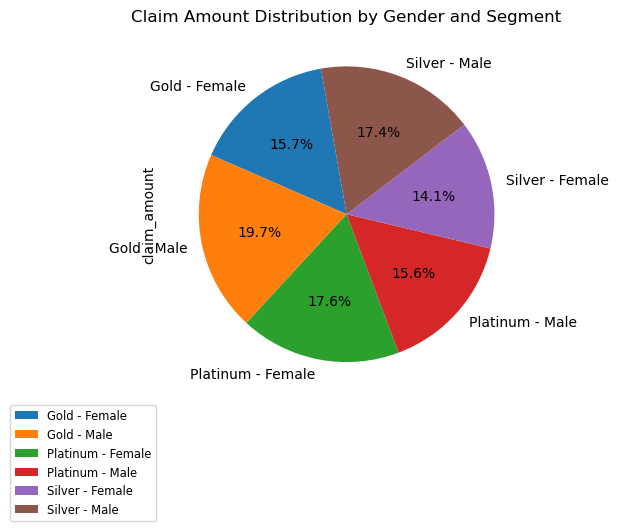

In [18]:
aggregate_value = combined_data.groupby(["Segment","gender"])["claim_amount"].sum()
aggregate_value = aggregate_value.reset_index()
plt.figure(figsize = (6,6))
aggregate_value.plot.pie(y = "claim_amount",labels = aggregate_value['Segment'] + ' - ' + aggregate_value['gender'],autopct = "%1.1f%%", startangle = 100)
plt.title('Claim Amount Distribution by Gender and Segment')
plt.legend( bbox_to_anchor = (0,0), fontsize = 'small')
plt.show()

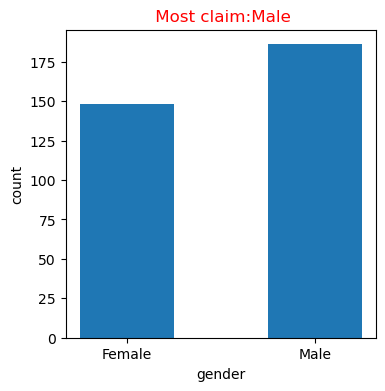

In [19]:
claim_gender_wise = combined_data.groupby(["gender","incident_cause"]).size()
claim_gender_wise = claim_gender_wise.reset_index(name = "count")
incident = ["Driver error","Other driver error"]
claim_gender_wise = claim_gender_wise[claim_gender_wise["incident_cause"].isin(incident)]
most_claimed_gender = claim_gender_wise.groupby(["gender"])["count"].sum().idxmax()
most_claimed_gender
plt.figure(figsize = (4,4))
plt.bar(claim_gender_wise["gender"],claim_gender_wise["count"],width = 0.5)
plt.xlabel("gender")
plt.ylabel("count")
plt.title(f" Most claim:{most_claimed_gender}",color = "red")
plt.show()

In [20]:
combined_data["fraudulent"] = combined_data["fraudulent"].apply(lambda x:1 if x == "Yes" else 0)
combined_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Injury claims,Age,customer_cat,1st_oct_prior
0,154557,Female,1978-05-23,DE,962-879-1238,Platinum,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.0,1.0,1,1,39,Adult,174
1,263204,Male,2072-12-20,TX,173-892-6314,Silver,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,1,0,-55,NaN,180
2,287476,Male,1988-07-28,FL,364-598-1549,Silver,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1622.0,2.0,1,0,29,Youth,349
3,441097,Male,2071-08-19,CA,187-348-8375,Gold,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,0,0,-54,NaN,194
4,524545,Female,1980-08-10,NC,798-862-5398,Gold,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,0,1,37,Adult,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,99674324,Male,2065-01-28,UT,517-562-4916,Silver,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,0,1,-47,NaN,86
1074,99723844,Female,2066-06-19,HI,457-752-1374,Gold,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,0,0,-49,NaN,268
1075,99761663,Female,2063-11-18,NC,643-246-4718,Silver,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,1,0,-46,NaN,180
1076,99892000,Male,1995-06-08,OR,395-246-6172,Gold,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,1,0,22,Youth,322


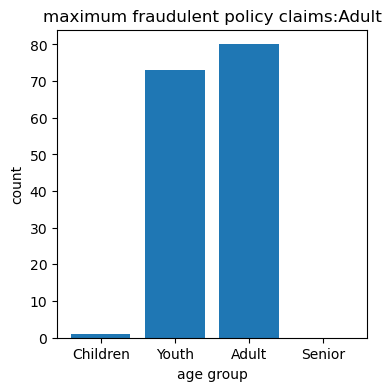

In [21]:
fraudulent = combined_data.groupby("customer_cat")["fraudulent"].sum()
fraudulent = fraudulent.reset_index(name = "count")
max_fraudulent = fraudulent.loc[fraudulent["count"].idxmax(),"customer_cat"]
max_fraudulent
plt.figure(figsize = (4,4))
plt.bar(fraudulent["customer_cat"],fraudulent["count"])
plt.xlabel("age group")
plt.ylabel("count")
plt.title(f"maximum fraudulent policy claims:{max_fraudulent}")
plt.show()

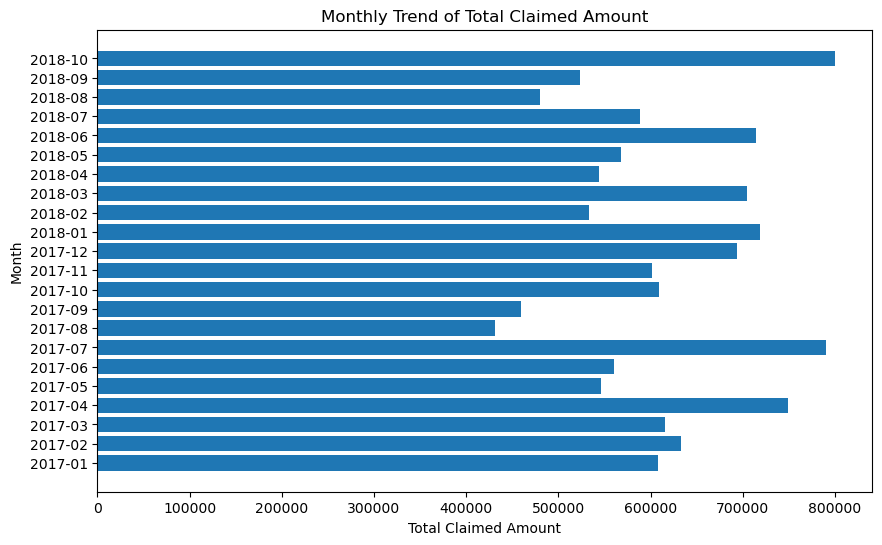

In [22]:
monthly_claimed_amount = combined_data.groupby(combined_data['claim_date'].dt.to_period("M"))['claim_amount'].sum()
monthly_claimed_amount = monthly_claimed_amount.reset_index(name = "Total_amount")
monthly_claimed_amount['claim_date'] = monthly_claimed_amount['claim_date'].astype(str)
monthly_claimed_amount
plt.figure(figsize = (10, 6))
plt.barh(monthly_claimed_amount["claim_date"],monthly_claimed_amount["Total_amount"])
plt.title('Monthly Trend of Total Claimed Amount')
plt.xlabel('Total Claimed Amount')
plt.ylabel('Month')
plt.show()

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


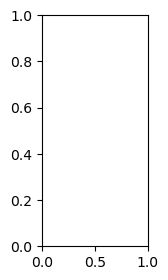

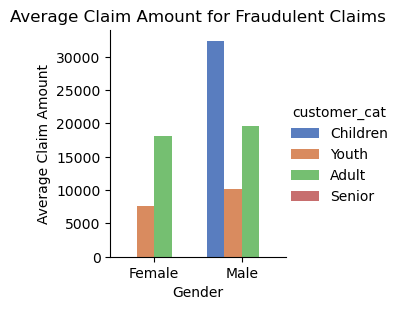

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


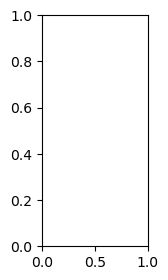

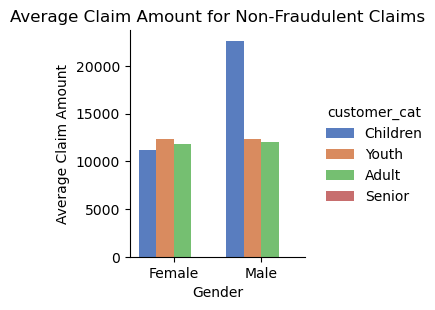

In [23]:
fraudulent_claims=combined_data[combined_data["fraudulent"]==1]
non_fraudulent_claims=combined_data[combined_data["fraudulent"]==0]

avg_claim_fraudulent = fraudulent_claims.groupby(["gender","customer_cat"])["claim_amount"].mean().round(2)
avg_claim_fraudulent = avg_claim_fraudulent.reset_index()
avg_claim__non_fraudulent = non_fraudulent_claims.groupby(["gender","customer_cat"])["claim_amount"].mean().round(2)
avg_claim__non_fraudulent = avg_claim__non_fraudulent.reset_index()

plt.figure(figsize = (3,3))
plt.subplot(1,2,1)
sns.catplot(x = 'gender', y = 'claim_amount', hue = 'customer_cat', kind = 'bar',height = 3,aspect = 1, data = avg_claim_fraudulent, palette = 'muted')
plt.title('Average Claim Amount for Fraudulent Claims')
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')
plt.show()

plt.figure(figsize = (3,3))
plt.subplot(1,2,2)
sns.catplot(x = 'gender', y = 'claim_amount', hue = 'customer_cat', kind = 'bar',height = 3,aspect = 1, data = avg_claim__non_fraudulent, palette = 'muted')
plt.title('Average Claim Amount for Non-Fraudulent Claims')
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')
plt.show()

In [24]:
male = combined_data.loc[combined_data["gender"] == "Male", "claim_amount"]
female = combined_data.loc[combined_data["gender"] == "Female", "claim_amount"]
stats.ttest_ind(male,female)

TtestResult(statistic=0.9621637581947702, pvalue=0.3361835205455027, df=1076.0)

In [25]:
observed_table = pd.crosstab(combined_data.Segment,combined_data.customer_cat)
stats.chi2_contingency(observed_table)

Chi2ContingencyResult(statistic=5.376645967859662, pvalue=0.25078705031162524, dof=4, expected_freq=array([[  2.44      , 113.98285714, 127.57714286],
       [  2.35      , 109.77857143, 122.87142857],
       [  2.21      , 103.23857143, 115.55142857]]))

In [26]:
fiscal_average = 10000
current_claim = combined_data["claim_amount"]
stats.ttest_1samp(current_claim,fiscal_average)

TtestResult(statistic=6.1451848607050525, pvalue=1.1227299138387255e-09, df=1077)

In [27]:
observed = pd.crosstab(combined_data["Injury claims"],combined_data.customer_cat)
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=1.2783843446942769, pvalue=0.5277185575423732, dof=2, expected_freq=array([[  5.7       , 266.27142857, 298.02857143],
       [  1.3       ,  60.72857143,  67.97142857]]))

In [28]:
stats.pearsonr(combined_data.total_policy_claims,combined_data.claim_amount)

PearsonRResult(statistic=-0.021886392719679328, pvalue=0.4728520871324124)